In [ ]:
import torchvision
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

<img src="random_forest.png" alt="Random forest" style="width:75%;">

In [5]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)
X_train = trainset.data.numpy().reshape(-1, 28*28)
y_train = trainset.targets.numpy()
X_test = testset.data.numpy().reshape(-1, 28*28)
y_test = testset.targets.numpy()

In [6]:
rf = RandomForestClassifier(n_estimators=250, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"Dokładność: {accuracy_score(y_test, y_pred):.4f}")

Dokładność: 0.9711


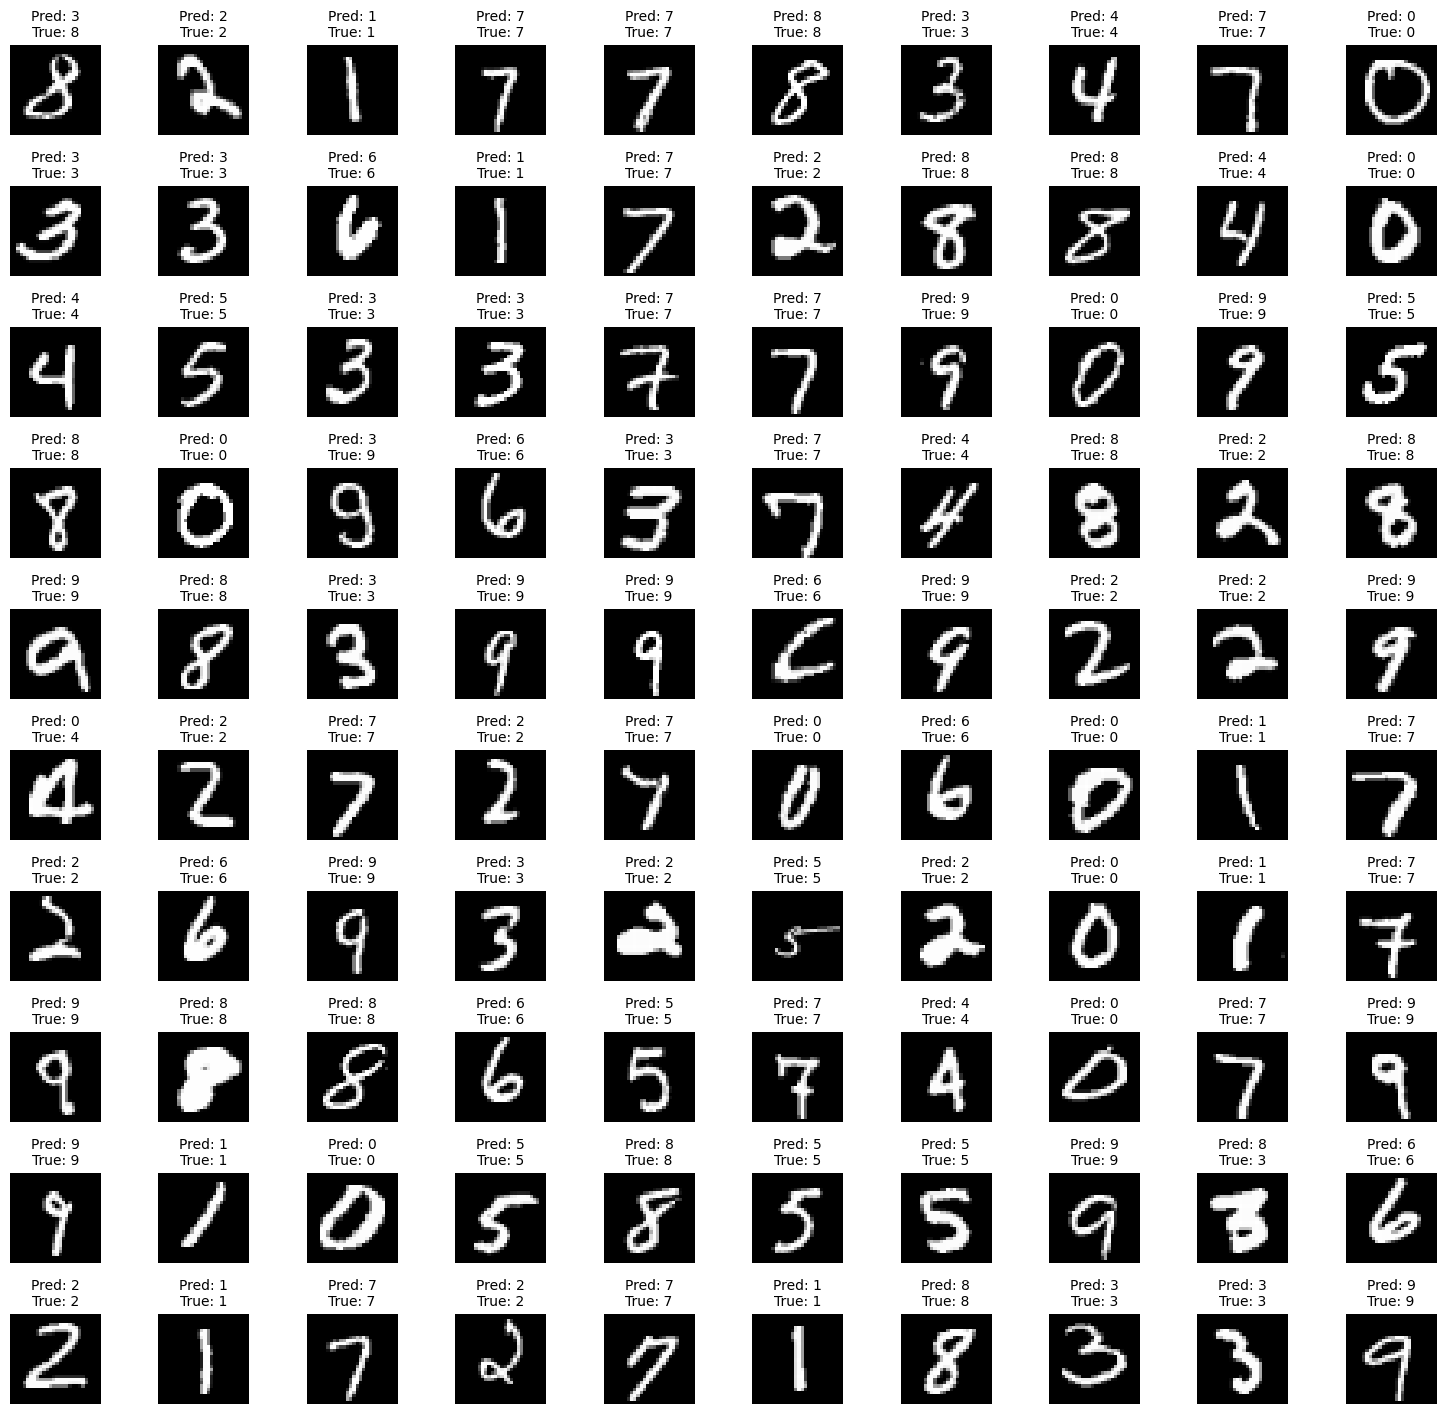

In [ ]:
indices = np.random.choice(len(X_test), 100, replace=False)

fig, axes = plt.subplots(10, 10, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    idx = indices[i]
    img = X_test[idx].reshape(28, 28)
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10)
    ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()